<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy122_2bodyt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Body Motion \& Collisions

### <font color='Red'> **Name** </font>


### <font color='Red'> **Date** </font>

# Objective

### To Understand Velocity Verlet Applied to 2-body systems, including their mutual interaction and thus their inevitable collisions.

# Introduction


## **2 Body Motion**
### So far we have only considered motion of a single particle. We know that reality is more complex, and thus here we consider our largest system yet, 2 particles! Both of these particles have their own equation-of-motion \begin{align} m_1\ddot{\mathbf{x}}_1 &= \mathbf{f}_{12} \\ m_2\ddot{\mathbf{x}}_2 &= \mathbf{f}_{21} \end{align} for positions of particle $\mathbf{x}_1$ and $\mathbf{x}_2$ respectively, interacting with a force between the particles $\mathbf{f}(\mathbf{x}_1, \mathbf{x}_2)$. Instead of a two-variable force, we may decrease the degrees-of-freedom by defining the inter-particle displacement: \begin{align} \Delta \mathbf{x}_{12} &= \mathbf{x}_1 - \mathbf{x}_2 \quad.\end{align} Therefore the inter-particle force is instead $\mathbf{f}(\mathbf{x}_{12})$ which is shortened to $\mathbf{f}(\mathbf{x}_{12}) = \mathbf{f}_{12}$. Note by virtue of Newton's 3rd Law, the force acting on particle 2 is the opposite: $\mathbf{f}_{21} = -\mathbf{f}_{12}$.


### In order to alleviate the abstraction, here we consider a common and simple two-body interaction force of Lennard-Jones. That is the aforementioned force is: \begin{align} \mathbf{f}(\mathbf{x}_{12}) = \mathbf{f}_{12} = 4\mathscr{E}\left( \frac{12}{R^{13}} - \frac{6}{R^{7}}\right)\frac{\Delta \mathbf{x}_{12}}{R},\quad\quad\quad R = |\mathbf{x}_{12}| = |\mathbf{x}_{21}|. \end{align} The parameter $\mathscr{E}$ is a scalar in units of energy, and describes the cohesive energy of this potential.

## **Momentum-Verlet**
### Here we consider the Momentum-Verlet integrator, with the equations of:\begin{align} \mathbf{x}(t+1) &= \mathbf{x}(t) + \left( \mathbf{p}(t) \,dt + \mathbf{f}(t) \frac{dt^2}{2} \right) \frac{1}{m} \\ \mathbf{f}(t+1) &= \,\,.... \\ \mathbf{p}(t+1) &= \mathbf{p}(t) + \frac{\left( \mathbf{f}(t) + \mathbf{f}(t+1) \right) \,dt}{2} \end{align} applied at every time-step.


## **Energy of the System**
### We now may calculate the energy of the system. We may partition the energy into 1-body and 2-body contributions. Here the 1-body contribution is known as the *kinetic-energy*, it is considered a 1-body contribution because it is only a function of each body independent of one another. Its functional form, in terms of momentum is: \begin{align} K &= \frac{\mathbf{p}^2_1}{2m} + \frac{\mathbf{p}^2_2}{2m} \quad. \end{align} Next the 2-body contribution, is the energy of the interaction, this is known as the *potential-energy*. It exists by virtue of the partciles not being in isolation, but interacting with something. Notice its functional form cannot be seperated like the kinetic-energy (1-body interaction): \begin{align} U(R) &= 4\mathscr{E} \left( \frac{1}{R^{12}} - \frac{1}{R^{6}} \right) \quad\quad.\end{align} With $\mathscr{E}$ is the same parameter defined earlier. Notice that we may apply: \begin{align} f_{12} &= - \frac{\partial U(R)}{\partial R} \,\frac{ \Delta \mathbf{x}_{12} }{R} \quad, \\ f_{21} &= - \frac{\partial U(R)}{\partial R} \,\frac{ \Delta \mathbf{x}_{21} }{R}\quad. \end{align}


## **Elastic Collisions**
### Now we consider collisions between the two particles. An elastic collision is an event whereby the particles exchange momentum, but the total kinetic energy is conserved.

## **Inelastic Collisions**
### There are two primary methods for inelastic collisions, kinetic-energy into potential-energy (total-energy conserved) or via friction (heat or deformation, i.e. total-energy not conserved). Here we will consider both. The potential-energy contribution 

### For the kinetic-energy ⇒ potential-energy, the total energy is conserved, and the result is the kinetic turns into potential-energy which binds the two particles.

### Frictional force considered here depends on velocity via Stokes' Law: \begin{align*} \mathbf{f} &= -\gamma \,\mathbf{p} \quad\quad. \end{align*}


### Let's import the necessary modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

π = np.pi

## Example Code for Collisions

In [ ]:
Δt = 0.001 ## s(detector)
tf = 10
timeline = np.arange(0, tf, Δt)

γ    = 0.00
m_i  = np.array([2., 4.]) ## kg
R_ix = np.array([[-1., 0., 0.],[4., 0., 0.]]) ## m
v_ix = np.array([[0.50, 0., 0.],[0., 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = np.zeros((2,3)) ## N
### empty arrays to save data
R_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )
K     = np.zeros(len(timeline))
U     = np.zeros(len(timeline))
for t in range(len(timeline)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2 / 2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 - 6/R**7) * np.array([Δx, -Δx])/R - γ * p_ix
    
    p_ix  += ( f_ix + F_ix ) * Δt / 2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 - 1/R**6)

## Plots

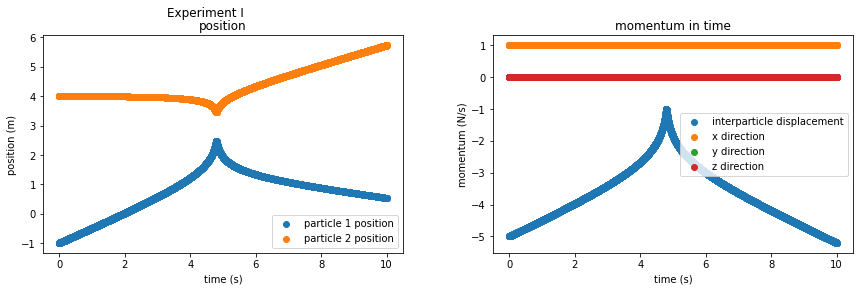

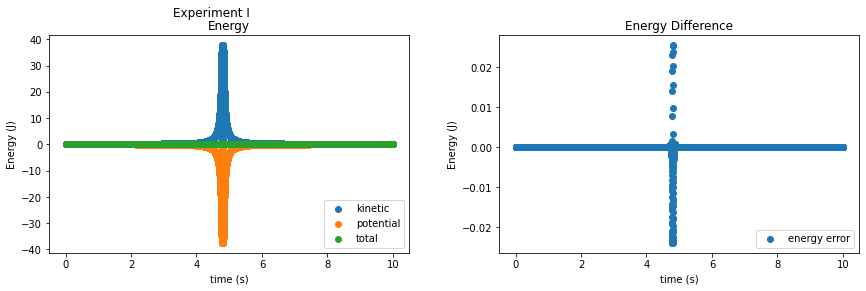

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, R_tix[:, 0, 0], label="particle 1 position")
ax1.scatter(timeline, R_tix[:, 1, 0], label="particle 2 position")
ax1.set_title("position")
ax1.set(xlabel='time (s)', ylabel='position (m)')
ax1.legend(loc="lower right")

ax2.scatter(timeline, R_tix[:, 0, 0]-R_tix[:, 1, 0], label="interparticle displacement")
ax2.set_title("relative displacement")
ax2.set(xlabel='time (s)', ylabel='displacement (m)')
ax2.legend(loc="lower right")
fig.show()

p_tx = np.sum(p_tix, axis=1)
plt.scatter(timeline, p_tx[:,0], label="x direction")
plt.scatter(timeline, p_tx[:,1], label="y direction")
plt.scatter(timeline, p_tx[:,2], label="z direction")
plt.title("momentum in time")
plt.xlabel("time (s)")
plt.ylabel("momentum (N/s)")
plt.legend()
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, K, label="kinetic")
ax1.scatter(timeline, U, label="potential")
ax1.scatter(timeline, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (J)')
ax1.legend(loc="lower right")

ax2.scatter(timeline, (K+U) - (K+U)[0], label="energy error")
ax2.set_title("Energy Difference")
ax2.set(xlabel='time (s)', ylabel='Energy (J)')
ax2.legend(loc="lower right")

fig.show()

#   <font color='Red'> **Elastic Scattering** </font>


###   <font color='Red'> Elastic Simulation, set $\gamma = 0.0$, Get trajectory </font>


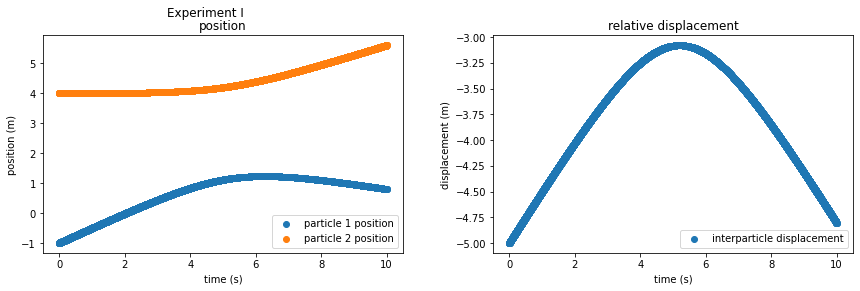

###   <font color='Red'> Get total Momentum in time </font>


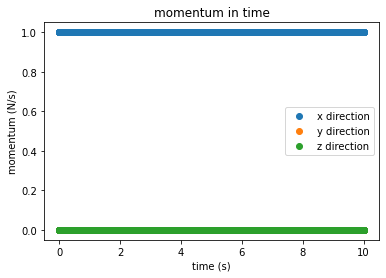

###   <font color='Red'> Get Energy in time (plot Kinetic, Potential, and Total) </font>


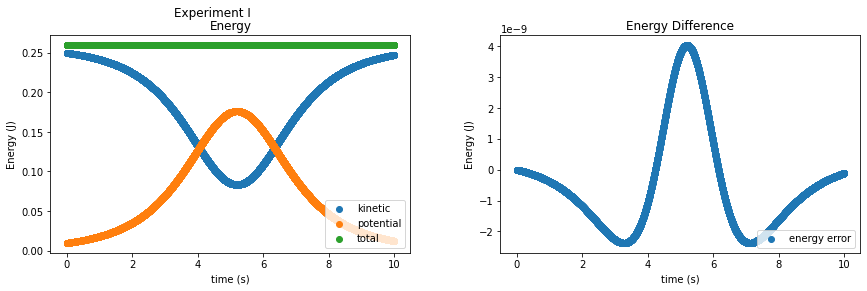

#   <font color='Red'> **Inelastic Scattering** </font>


###   <font color='Red'> Inelastic Simulation, set $\gamma \ne 0.0$, Get trajectory </font>

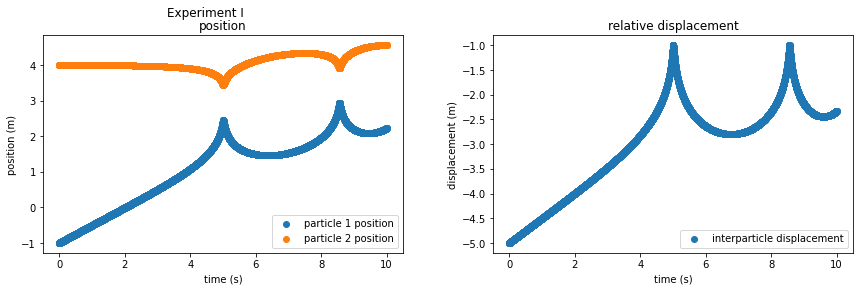

###   <font color='Red'> Get total Momentum in time </font>


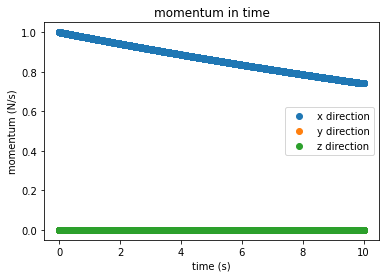

###   <font color='Red'> Get Energy in time (plot Kinetic, Potential, and Total) </font>

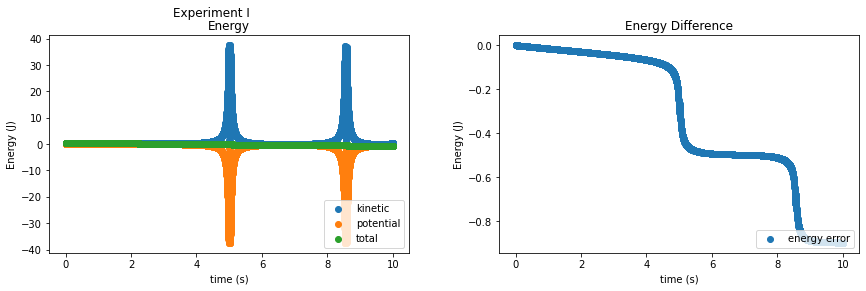

#   <font color='Red'> **Conclusion** </font>


##  <font color='Red'> Q1: What is an elastic collision between 2-particles? </font>

##  <font color='Red'> Q2: What is an inelastic collision between 2-particles with friction? </font>